### Exercise 1

Consider the Breast Cancer Wisconsin dataset. It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features are used to classify the tumors into malignant (cancerous) or benign (non-cancerous).

#### Dataset Overview:
- **Number of Instances:** 569  
- **Number of Features:** 30 numeric (real-valued features)  
- **Target Variable:** Binary (0 for malignant, 1 for benign)  

1. **Count Patients:**  
   Determine the number of patients with and without cancer in the dataset.

2. **Scatterplot of Features:**  
   Select two features and make a scatterplot of their values, plotting the data corresponding to patients with and without cancer in different colors.

3. **Perform PCA on the Data:**  
   Plot the trend of the following quantities:  
   - The singular values $ \sigma_k $.  
   - The cumulative fraction of singular values:  
     $$
     \frac{\sum_{i=1}^q \sigma_i}{\sum_{i=1}^k \sigma_i}.
     $$
   - The cumulative fraction of the "explained variance":  
     $$
     \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^k \sigma_i^2}.
     $$

4. **Scatterplot of Principal Components:**  
   Make a scatterplot of the first two principal components of the dataset.

5. **Randomized SVD Function:**  
   Implement a function for computing the randomized SVD of rank $ k $ for a generic matrix.

6. **Randomized SVD of the Dataset:**  
   Set $ k = 10 $ and compute the randomized SVD of the dataset. Compute the principal components.

7. **Top Influential Features:**  
   Select and display the top five most influential features for each principal axis. Use the feature names from `data.feature_names`.

8. **Relative Reconstruction Error:**  
   Compute the relative reconstruction error between the original matrix $ X $ and the approximation $ \hat{X} $ obtained using the randomized SVD, varying $ k $. The relative reconstruction error is given by:  
   $$
   \epsilon_R = \frac{\|X - \hat{X}\|_F}{\|X\|_F}.
   $$
   Visualize the trend of the error with respect to the rank $ k $ and comment on the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
data = pd.read_csv("data.csv")

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


1. **Count Patients:**  
   Determine the number of patients with and without cancer in the dataset.

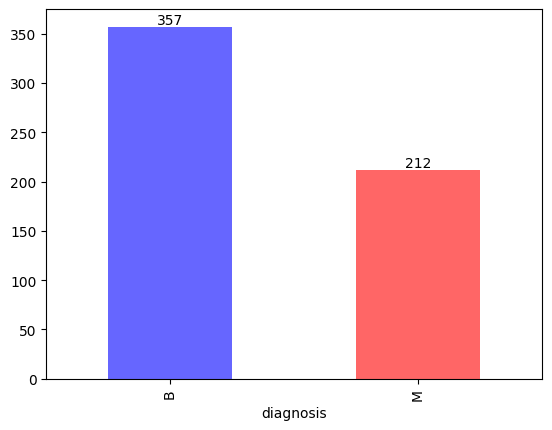

In [4]:
# Count 'M' and 'B' in diagnosis column
data['diagnosis'].value_counts().plot(kind='bar', color=['blue', 'red'], alpha=0.6)
counts = data['diagnosis'].value_counts()
for i, count in enumerate(counts):
	plt.text(i, count, str(count), ha='center', va='bottom')

2. **Scatterplot of Features:**  
   Select two features and make a scatterplot of their values, plotting the data corresponding to patients with and without cancer in different colors.


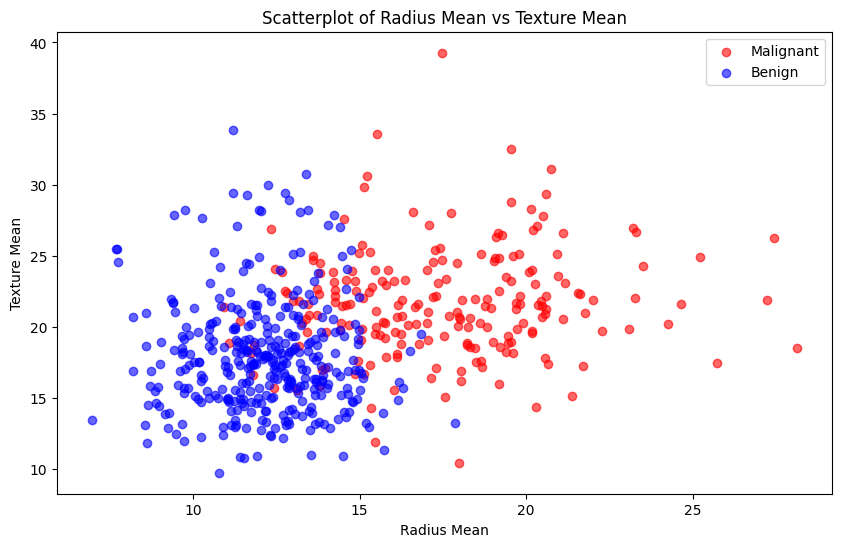

In [5]:
# Scatterplot of radius_mean vs texture_mean
plt.figure(figsize=(10, 6))

# Plotting data for malignant (M) and benign (B) tumors
malignant = data[data['diagnosis'] == 'M']
benign = data[data['diagnosis'] == 'B']

plt.scatter(malignant['radius_mean'], malignant['texture_mean'], color='red', label='Malignant', alpha=0.6)
plt.scatter(benign['radius_mean'], benign['texture_mean'], color='blue', label='Benign', alpha=0.6)

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatterplot of Radius Mean vs Texture Mean')
plt.legend()
plt.show()

3. **Perform PCA on the Data:**  
   Plot the trend of the following quantities:  
   - The singular values $ \sigma_k $.  
   - The cumulative fraction of singular values:  
     $$
     \frac{\sum_{i=1}^q \sigma_i}{\sum_{i=1}^k \sigma_i}.
     $$
   - The cumulative fraction of the "explained variance":  
     $$
     \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^k \sigma_i^2}.
     $$

In [6]:
# Define X and y
X = data.iloc[:, 2:].values.T
y = data.iloc[:, 1].values

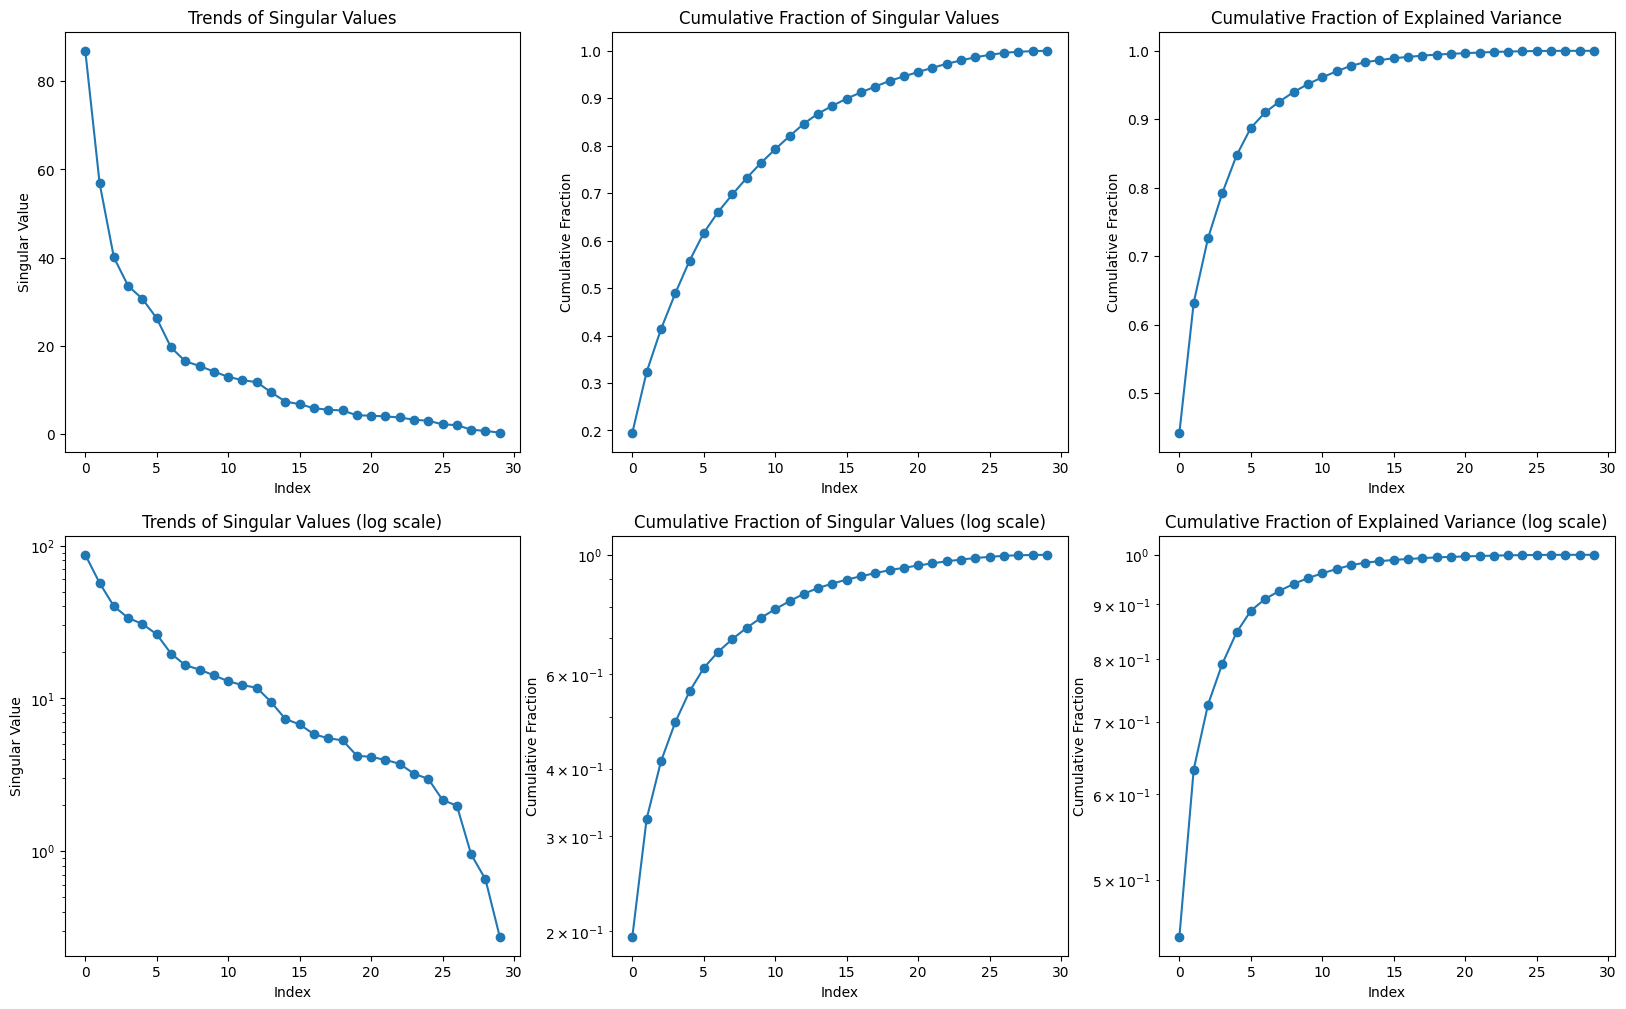

In [7]:
# Center the data
X_centered = X - X.mean(axis=1)[:, None]
# Normalize the data
X_normalized = X_centered / X_centered.std(axis=1)[:, None]

# Perform Singular Value Decomposition
U, s, V = np.linalg.svd(X_normalized, full_matrices=False)

# plot
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
# Plot the trends of the singular values
ax[0][0].plot(s, 'o-')
ax[0][0].set_title('Trends of Singular Values')
ax[0][0].set_xlabel('Index')
ax[0][0].set_ylabel('Singular Value')
# Plot the cumulative fraction of singular values
ax[0][1].plot(np.cumsum(s) / np.sum(s), 'o-')
ax[0][1].set_title('Cumulative Fraction of Singular Values')
ax[0][1].set_xlabel('Index')
ax[0][1].set_ylabel('Cumulative Fraction')

# Plot the cumulative fraction of explained variance
ax[0][2].plot(np.cumsum(s ** 2) / np.sum(s ** 2), 'o-')
ax[0][2].set_title('Cumulative Fraction of Explained Variance')
ax[0][2].set_xlabel('Index')
ax[0][2].set_ylabel('Cumulative Fraction')

# Plot the trends of the singular values (log scale)
ax[1][0].semilogy(s, 'o-')
ax[1][0].set_title('Trends of Singular Values (log scale)')
ax[1][0].set_xlabel('Index')
ax[1][0].set_ylabel('Singular Value')

# Plot the cumulative fraction of singular values (log scale)
ax[1][1].semilogy(np.cumsum(s) / np.sum(s), 'o-')
ax[1][1].set_title('Cumulative Fraction of Singular Values (log scale)')
ax[1][1].set_xlabel('Index')
ax[1][1].set_ylabel('Cumulative Fraction')

# Plot the cumulative fraction of explained variance (log scale)
ax[1][2].semilogy(np.cumsum(s ** 2) / np.sum(s ** 2), 'o-')
ax[1][2].set_title('Cumulative Fraction of Explained Variance (log scale)')
ax[1][2].set_xlabel('Index')
ax[1][2].set_ylabel('Cumulative Fraction')

plt.show()


4. **Scatterplot of Principal Components:**  
   Make a scatterplot of the first two principal components of the dataset.


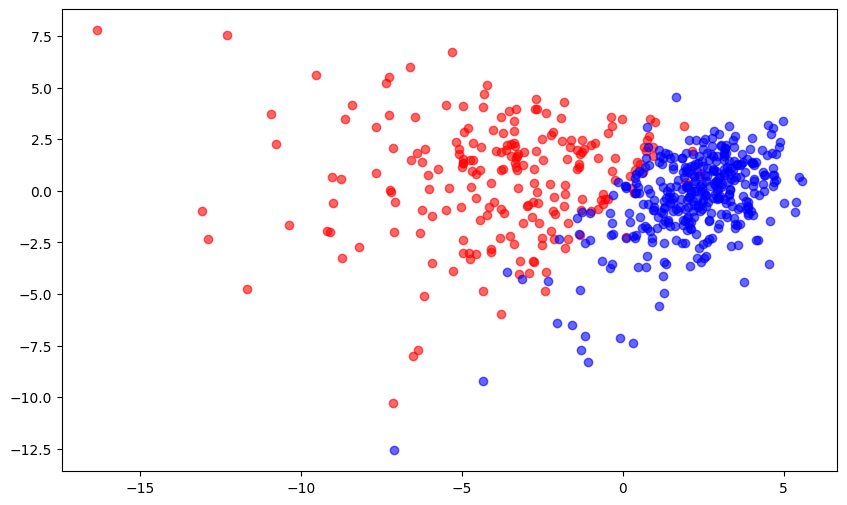

In [8]:
principal_directions = U.T

first_2_components = principal_directions[:2]@X_normalized

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(first_2_components[0, y == 'M'], first_2_components[1, y == 'M'], color='red', label='Malignant', alpha=0.6)
plt.scatter(first_2_components[0, y == 'B'], first_2_components[1, y == 'B'], color='blue', label='Benign', alpha=0.6)


5. **Randomized SVD Function:**  
   Implement a function for computing the randomized SVD of rank $ k $ for a generic matrix.


In [9]:
def randomized_svd(A, k):
  m = A.shape[1]
  P = np.random.randn(m, k)
  Z = A @ P
  Q, _ = np.linalg.qr(Z)
  Y = Q.T @ A
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT


6. **Randomized SVD of the Dataset:**  
   Set $ k = 10 $ and compute the randomized SVD of the dataset. Compute the principal components.

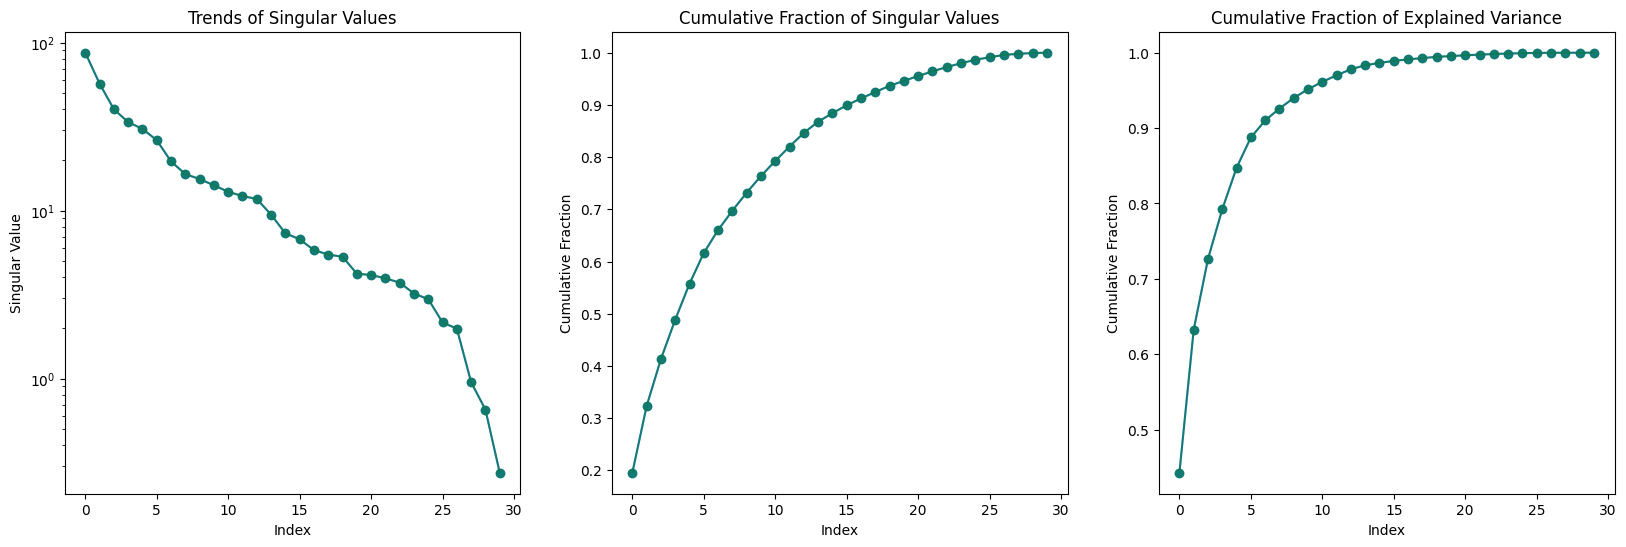

In [10]:
k = 30
U_approx, s_approx, V_approx = randomized_svd(X_normalized, k)

# plot
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
# Plot the trends of the singular values
ax[0].semilogy(s_approx, 'o-')
ax[0].semilogy(s[:k], 'o-', color='green', alpha=0.3)
ax[0].set_title('Trends of Singular Values')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Singular Value')
# Plot the cumulative fraction of singular values
ax[1].plot(np.cumsum(s_approx) / np.sum(s_approx), 'o-')
ax[1].plot(np.cumsum(s[:k]) / np.sum(s[:k]), 'o-', color='green', alpha=0.3)
ax[1].set_title('Cumulative Fraction of Singular Values')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Cumulative Fraction')
# Plot the cumulative fraction of explained variance
ax[2].plot(np.cumsum(s_approx ** 2) / np.sum(s_approx ** 2), 'o-')
ax[2].plot(np.cumsum(s[:k] ** 2) / np.sum(s[:k] ** 2), 'o-', color='green', alpha=0.3)
ax[2].set_title('Cumulative Fraction of Explained Variance')
ax[2].set_xlabel('Index')
ax[2].set_ylabel('Cumulative Fraction')
plt.show()

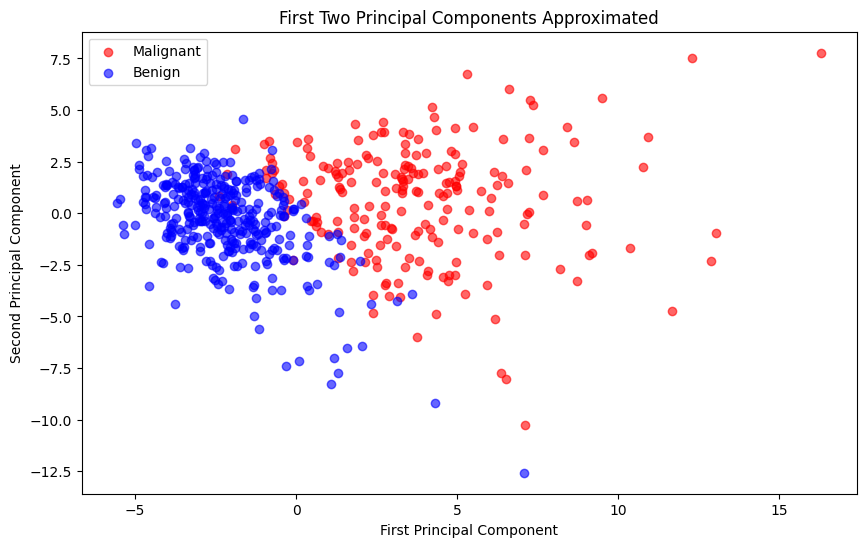

In [11]:
# Compute the principal components
principal_directions_approx = U_approx.T

first_2_components_approx = principal_directions_approx[:2] @ X_normalized
# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(first_2_components_approx[0, y == 'M'], first_2_components_approx[1, y == 'M'], color='red', label='Malignant', alpha=0.6)
plt.scatter(first_2_components_approx[0, y == 'B'], first_2_components_approx[1, y == 'B'], color='blue', label='Benign', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components Approximated')
plt.legend()
plt.show()

7. **Top Influential Features:**  
   Select and display the top five most influential features for each principal axis. Use the feature names from `data.feature_names`.

In [12]:
feature_names = data.keys().to_list()[2:]

for i, paxis in enumerate(principal_directions):
  idx = np.argsort(np.abs(paxis))[::-1]
  print(f"\n{i+1} PC: ", end="")
  for j in idx[:5]:
    print(f"{feature_names[j]}, ", end="")


1 PC: concave points_mean, concavity_mean, concave points_worst, compactness_mean, perimeter_worst, 
2 PC: fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst, radius_mean, compactness_se, 
3 PC: texture_se, smoothness_se, symmetry_se, symmetry_worst, radius_se, 
4 PC: texture_worst, texture_mean, texture_se, smoothness_mean, area_se, 
5 PC: smoothness_mean, concavity_se, smoothness_worst, symmetry_mean, compactness_se, 
6 PC: symmetry_worst, symmetry_se, smoothness_worst, symmetry_mean, smoothness_se, 
7 PC: fractal_dimension_worst, concave points_se, area_se, perimeter_se, radius_se, 
8 PC: smoothness_se, texture_se, smoothness_mean, symmetry_mean, symmetry_worst, 
9 PC: concavity_se, symmetry_se, concave points_se, symmetry_mean, radius_se, 
10 PC: symmetry_mean, fractal_dimension_se, symmetry_se, concavity_worst, texture_se, 
11 PC: concavity_se, texture_se, concave points_se, compactness_mean, texture_mean, 
12 PC: compactness_worst, symmetry_se, smoothness_mean

2. **Relative Reconstruction Error:**  
   Compute the relative reconstruction error between the original matrix $ X $ and the approximation $ \hat{X} $ obtained using the randomized SVD, varying $ k $. The relative reconstruction error is given by:  
   $$
   \epsilon_R = \frac{\|X - \hat{X}\|_F}{\|X\|_F}.
   $$
   Visualize the trend of the error with respect to the rank $ k $ and comment on the results.

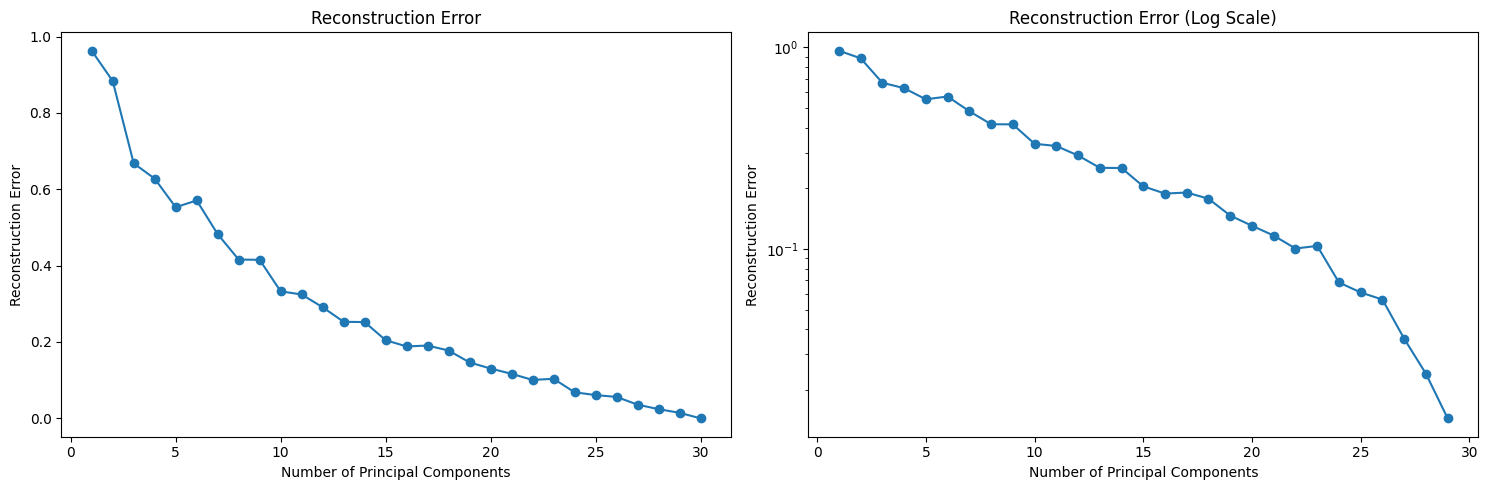

In [13]:
ks = range(1, 31)
np.random.seed(42)
Xs_reconstructed = []
for k in ks:
	U_k, s_k, V_k = randomized_svd(X_normalized, k)
	Xs_reconstructed.append(U_k @ np.diag(s_k) @ V_k)

errors = [np.linalg.norm(X_normalized - X_reconstructed, 'fro')/np.linalg.norm(X_normalized) for X_reconstructed in Xs_reconstructed]


plt.figure(figsize=(15, 5))

# First plot with plot
plt.subplot(1, 2, 1)
plt.plot(ks, errors, 'o-')
plt.title('Reconstruction Error')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')

# Second plot with semilogy
plt.subplot(1, 2, 2)
plt.semilogy(ks[:-1], errors[:-1], 'o-') # Skip the last point for better visualization given that it should be expected to be 0
plt.title('Reconstruction Error (Log Scale)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')

plt.tight_layout()
plt.show()

#### Comment:
- The trend displayed in the plot is not monotonically decreasing as one would expect. This is due to the randomness in the randomized SVD algorithm. The error may increase for some values of $ k $, but it should decrease on average as $ k $ increases. 
- The decrease in the error is almost exponential with respect to $ k $, visualizing the error on a logarithmic scale the trend appears almost linear.
- There is no clear "elbow" in the plot, which would indicate the optimal value of $ k $ to use for the approximation.

---

# Exercise 2:

#### Dataset Description:
Load the data from the file `ex2.txt` as follows:  
```python
import pandas as pd
import numpy as np

df = pd.read_csv('./ex2.txt', sep=',', header=None)
df.columns = ['Score_1', 'Score_2', 'label']
m = df.shape[0]
X = np.hstack((np.ones((m, 1)), df[['Score_1', 'Score_2']].values))
y = np.array(df.label.values).reshape(-1, 1)
```

- The dataset contains **100 rows**, each representing a student.
- **Columns**:  
  - **Score_1**: Marks obtained in the first exam of the first year of the Master.  
  - **Score_2**: Marks obtained in the second exam of the first year of the Master.  
  - **label**: `1` if the student completed the Master in 2 years, otherwise `0`.

#### Logistic Regression Model:
The logistic regression model is defined as:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$
where $ \theta \in \mathbb{R}^3 $ is the parameter vector.

### Tasks:

1. **Gradient of the Cost Function**  
   The cost function for logistic regression is the log-loss, defined as:
   $$
   J(\theta) = -\frac{1}{100} \sum_{i=1}^{100} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right].
   $$
   Derive the gradient of $ J(\theta) $ with respect to the parameter vector $ \theta $.

2. **Implement SGD**  
   Write the Stochastic Gradient Descent (SGD) algorithm to minimize $ J(\theta) $. 

3. **Compute Optimal $ \theta $:**  
   Use the SGD algorithm to compute the optimal value of $ \theta $. 



In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('./ex2.txt', sep=',', header=None)
df.columns = ['Score_1', 'Score_2', 'label']
m = df.shape[0]
X = np.hstack((np.ones((m, 1)), df[['Score_1', 'Score_2']].values))
y = np.array(df.label.values).reshape(-1, 1)

In [15]:
import jax
import jax.numpy as jnp

def logistic_regression_model(w, X): # in the given formula is not used bias
	return 1/(1+jnp.exp(-jnp.dot(w, X)))

def log_loss(w, X, y):
	pred = logistic_regression_model(w, X)
	return -jnp.mean(y * jnp.log(pred) + (1 - y) * jnp.log(1 - pred))
	

1. **Gradient of the Cost Function**  
   The cost function for logistic regression is the log-loss, defined as:
   $$
   J(\theta) = -\frac{1}{100} \sum_{i=1}^{100} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right].
   $$
   Derive the gradient of $ J(\theta) $ with respect to the parameter vector $ \theta $.

### Solution:

First, I will calculate $\nabla J(\theta)$ with respect to $h_{\theta}(x_i)$, then $\nabla h_{\theta}(x_i)$ with respect to $z = \theta \cdot x_i$, and finally $\nabla z$ with respect to $\theta$. Then I will apply the chain rule to obtain $\nabla_{\theta} J(\theta)$.

$$
\nabla J_{\theta} = -\frac{1}{m} \sum_{i=1}^{m} \left[ \frac{y_i}{h_{\theta}(x_i)} - \frac{1 - y_i}{1 - h_{\theta}(x_i)} \right] = -\frac{1}{m} \sum_{i=1}^m \left[\frac{y}{h_{\theta}(x_i)} - \frac{(1 - y_i)}{1-h_{\theta}(x_i)}\right]
$$

$$
\nabla h_{\theta}(x_i) = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right) = \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1 + e^{-z}}{(1 + e^{-z})^2} - \frac{1}{(1 + e^{-z})^2} 
= h_{\theta}{x_i} \cdot (1 - frac{1}{1 + e^{-z}}) = h_{\theta}{x_i} \cdot (1 - h_{\theta}{x_i})
$$

$$
\nabla z = \nabla (\theta \cdot x_i) = x_i
$$

Using the chain rule:

$$
\nabla_{\theta} J(\theta) = \nabla J_{\theta} \cdot \nabla h_{\theta}(x_i) \cdot \nabla z
$$

Therefore, the gradients with respect to each parameter $\theta_j$ are:

$$
\nabla_{\theta_0} J(\theta) = -0.01 \sum_{i=1}^{100} \left[ \frac{y_i}{h_{\theta}(x_i)} - \frac{1 - y_i}{1 - h_{\theta}(x_i)} \right] \cdot h_{\theta}(x_i) \cdot (1 - h_{\theta}(x_i)) \cdot 1 \\
=  -0.01 \sum_{i=1}^{100} \left[ y_i (1 - h_{\theta}(x_i)) - (1 - y_i) h_{\theta}(x_i) \right] = -0.01 \sum_{i=1}^{100} \left[ y_i - h_{\theta}(x_i) \right]
$$

$$
\nabla_{\theta_1} J(\theta) = -0.01 \sum_{i=1}^{100} \left[ \frac{y_i}{h_{\theta}(x_i)} - \frac{1 - y_i}{1 - h_{\theta}(x_i)} \right] \cdot h_{\theta}(x_i) \cdot (1 - h_{\theta}(x_i)) \cdot x_{i, 1} \\
=  -0.01 \sum_{i=1}^{100} \left[ y_i (1 - h_{\theta}(x_i)) - (1 - y_i) h_{\theta}(x_i) \right] \cdot x_{i, 1} = -0.01 \sum_{i=1}^{100} \left[ y_i - h_{\theta}(x_i) \right] \cdot x_{i, 1}
$$

$$
\nabla_{\theta_2} J(\theta) = -0.01 \sum_{i=1}^{100} \left[ \frac{y_i}{h_{\theta}(x_i)} - \frac{1 - y_i}{1 - h_{\theta}(x_i)} \right] \cdot h_{\theta}(x_i) \cdot (1 - h_{\theta}(x_i)) \cdot x_{i, 2} \\
=  -0.01 \sum_{i=1}^{100} \left[ y_i (1 - h_{\theta}(x_i)) - (1 - y_i) h_{\theta}(x_i) \right] \cdot x_{i, 2} = -0.01 \sum_{i=1}^{100} \left[ y_i - h_{\theta}(x_i) \right] \cdot x_{i, 2}
$$

This can also be checked via code, even though some simplification of the results would be needed.


In [16]:
import sympy as sp

sy = sp.MatrixSymbol('y', m, 1)
h = sp.symbols('h')
i = sp.symbols('i')
J_theta = -(1/m) * sp.Sum(sy[i, 0] * sp.log(h) + (1 - sy[i, 0]) * sp.log(1 - h), (i, 1, m))


# Compute the gradient of the cost function wrt the model
print('Cost function:')
grad_J_h = J_theta.diff(h)
print(grad_J_h)

# Compute the gradient of the sigmoid function wrt the parameters
print('\nSigmoid function:')
sig = 1/(1 + sp.exp(-h))
grad_h_theta = sig.diff(h)
print(grad_h_theta)

# Compute the gradient of matrix-vector product wrt the parameters (thetas)
print('\nMatrix-vector product:')
t0, t1, t2 = sp.symbols('t0 t1 t2')
x1, x2 = sp.symbols('x1 x2')
theta = sp.Matrix([t0, t1, t2])
Xi = sp.Matrix([1, x1, x2])
prod = theta.T @ Xi
grad_prod_theta = [prod.diff(ti) for ti in theta]
for i in range(len(grad_prod_theta)):
	print(f"{theta[i]}: {grad_prod_theta[i]}")

# Use the chain rule to compute the gradient of the cost function wrt the parameters
grad_J_theta = [grad_J_h * grad_h_theta * grad_prod_theta[i] for i in range(len(grad_prod_theta))]


Cost function:
-0.01*Sum(-(1 - y[i, 0])/(1 - h) + y[i, 0]/h, (i, 1, 100))

Sigmoid function:
exp(-h)/(1 + exp(-h))**2

Matrix-vector product:
t0: Matrix([[1]])
t1: Matrix([[x1]])
t2: Matrix([[x2]])


In [17]:
print("Gradient w.r.t. theta 0")
grad_J_theta[0]

Gradient w.r.t. theta 0


Matrix([[-0.01*exp(-h)*Sum(-(1 - y[i, 0])/(1 - h) + y[i, 0]/h, (i, 1, 100))/(1 + exp(-h))**2]])

In [18]:
print("Gradient w.r.t. theta 1")
grad_J_theta[1]

Gradient w.r.t. theta 1


Matrix([[-0.01*x1*exp(-h)*Sum(-(1 - y[i, 0])/(1 - h) + y[i, 0]/h, (i, 1, 100))/(1 + exp(-h))**2]])

In [19]:
print("Gradient w.r.t. theta 2")
grad_J_theta[2]

Gradient w.r.t. theta 2


Matrix([[-0.01*x2*exp(-h)*Sum(-(1 - y[i, 0])/(1 - h) + y[i, 0]/h, (i, 1, 100))/(1 + exp(-h))**2]])

2. **Implement SGD**  
   Write the Stochastic Gradient Descent (SGD) algorithm to minimize $ J(\theta) $. 

In [20]:
from tqdm.notebook import tqdm

def SGD(theta, X, y, loss, grad_loss, lr=1e-2, epochs=100, batch_size=1):
	losses = []
	for epoch in tqdm(range(epochs)):
		# Shuffle the data
		indices = np.random.permutation(len(X))
		data = X[indices]
		labels = y[indices]

		# iterate and update parameter over the dataset
		for i in range(0, len(data), batch_size):			
			theta = theta - lr * jnp.mean(grad_loss(theta, data[i:i+batch_size], labels[i:i+batch_size]), axis=0)

		losses.append(loss(theta, X, y))
	return theta, losses

3. **Compute Optimal $ \theta $:**  
   Use the SGD algorithm to compute the optimal value of $ \theta $. 

In [21]:
np.log(1e-6)

np.float64(-13.815510557964274)

In [22]:
import jax
import jax.numpy as jnp

def logistic_regression_model(w, X):
	return 1 / (1 + jnp.exp(-jnp.dot(X, w.T)))

def log_loss(w, X, y):
	pred = logistic_regression_model(w, X)
	pred = jnp.clip(pred, 1e-6, 1 - 1e-6) # Clip the values to avoid 0*log(0) which is undefined
	return -jnp.mean(y * jnp.log(pred) + (1 - y) * jnp.log(1 - pred))

def grad_function(theta, X, y):
	pred = logistic_regression_model(theta, X)
	grad = -np.dot(X.T, (y - pred)) / len(y)
	return grad


  0%|          | 0/50 [00:00<?, ?it/s]

[[-0.9717292   0.02827085  0.02827085]]


Text(0.5, 1.0, 'Loss over epochs')

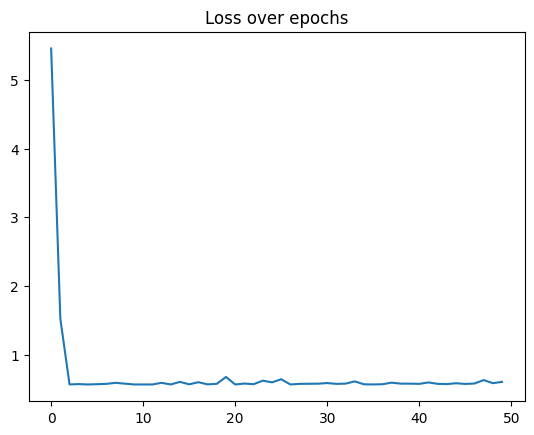

In [23]:
np.random.seed(42)

theta = np.random.randn(3).reshape(1, -1)
theta = np.array([[0, 1, 1]], dtype=np.float64) # initialization "close" to the best classifier, still log loss would converge to average predictions to minimize the loss
epochs = 50
lr = 1e-3

loss_jit = jax.jit(log_loss)
grad_jit = jax.grad(loss_jit, argnums=0)
grad_jit = grad_function



theta, losses = SGD(theta, X, y, loss_jit, grad_jit, lr=lr, epochs=epochs, batch_size=1)
print(theta)
plt.plot(losses)
plt.title("Loss over epochs")

In [24]:
# The final classification can be done with a step function between class 0 and class 1 at value 0.5
predictions = [1 if p > 0.5 else 0 for p in logistic_regression_model(theta, X).flatten()]
accuracy = np.sum(predictions == y.flatten())/len(y.flatten())
print(f"The final classifier accuracy is: {accuracy} \n The model predicten {np.sum(predictions)} times class 1 and {len(predictions)-np.sum(predictions)} times class 0")


The final classifier accuracy is: 0.92 
 The model predicten 66 times class 1 and 34 times class 0


#### Note:
The model reaches the optimal value consistently in a limited number of iterations only if initialized with values close to the correct solution.
The learning rate may be also a critical parameter to tune for the convergence of the algorithm.

#### Extra: visualizing the obtained model

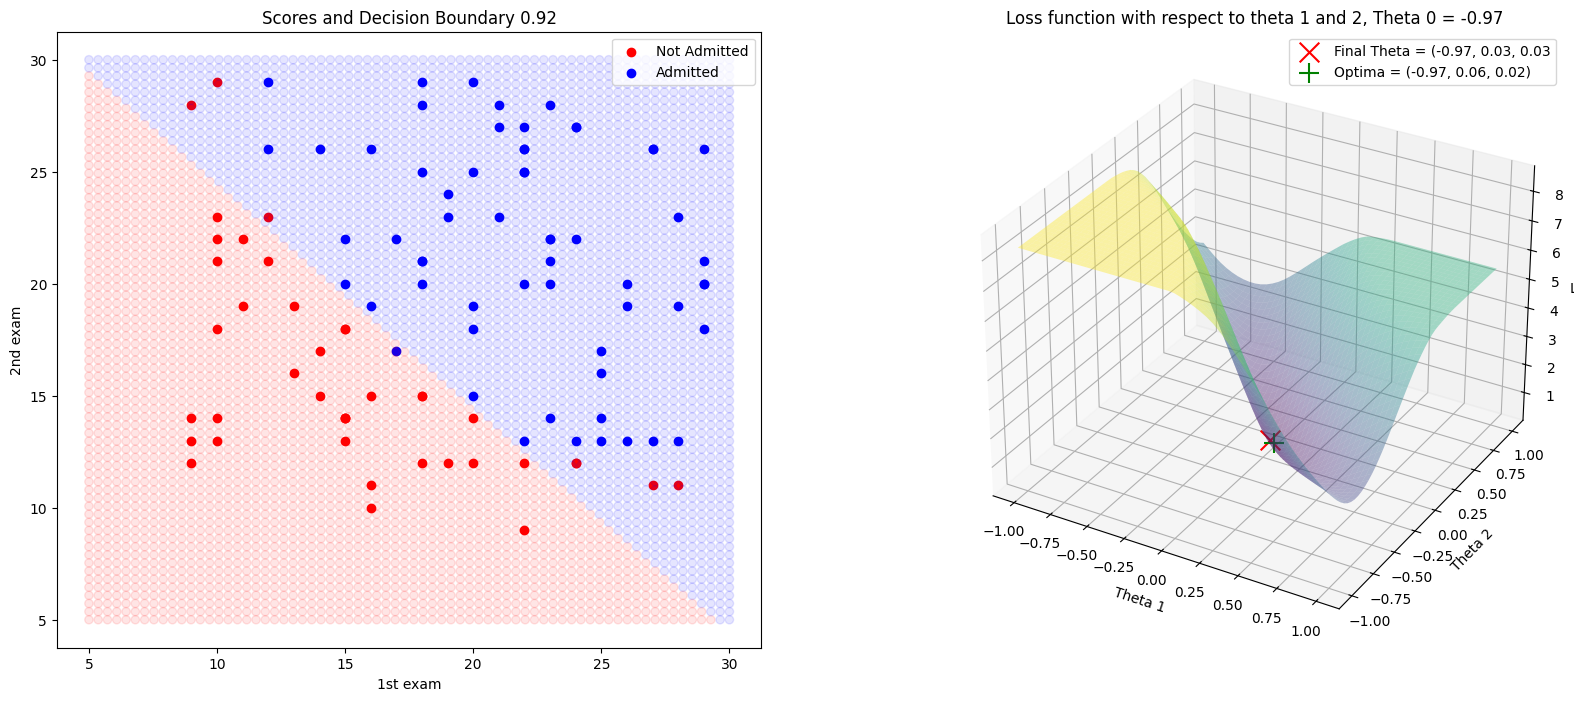

In [25]:
# accuracy
preds = [1 if x > 0.5 else 0 for x in logistic_regression_model(theta, X).flatten()]
accuracy = np.sum(preds == y.flatten())/len(y)

fig = plt.figure(figsize=(20, 8))

# First subplot: Plot the dataset
ax1 = fig.add_subplot(121)
ax1.scatter(df.Score_1[df.label == 0], df.Score_2[df.label == 0], color='red', label='Not Admitted')
ax1.scatter(df.Score_1[df.label == 1], df.Score_2[df.label == 1], color='blue', label='Admitted')
grid_density = 70
x0 = np.ones(grid_density)
x1 = np.linspace(5, 30, grid_density)
x2 = np.linspace(5, 30, grid_density)
xs = [[x1[i], x2[j]] for i in range(len(x1)) for j in range(len(x2))]
Xs = np.array([[1, x[0], x[1]] for x in xs])
ys = ['b' if x > 0.5 else 'r' for x in logistic_regression_model(theta, Xs).flatten()]

ax1.scatter(Xs[:, 1], Xs[:, 2], color=ys, alpha=0.1)
ax1.set_xlabel('1st exam')
ax1.set_ylabel('2nd exam')

ax1.set_title('Scores and Decision Boundary {accuracy:.2f}'.format(accuracy=accuracy))
ax1.legend()

# Second subplot: Plot the shape of the loss function in 3D with respect to theta_1 and theta_2
ax2 = fig.add_subplot(122, projection='3d')
theta_1 = np.linspace(-1, 1, 50)
theta_2 = np.linspace(-1, 1, 50)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
theta_0 = np.ones_like(theta_1) * theta[0, 0]
theta_12 = np.stack([theta_0, theta_1, theta_2], axis=-1)
losses = np.array([log_loss(np.array([t]), X, y) for t in theta_12.reshape(-1, 3)]).reshape(50, 50)

ax2.plot_surface(theta_1, theta_2, losses, cmap='viridis', alpha=0.4)
ax2.set_xlabel('Theta 1')
ax2.set_ylabel('Theta 2')
ax2.set_zlabel('Loss')
ax2.set_title(f'Loss function with respect to theta 1 and 2, Theta 0 = {theta[0, 0]:.2f}')

# Add the final theta as a red point
ax2.scatter(theta[0, 1], theta[0, 2], log_loss(theta, X, y), color='red', label=f'Final Theta = ({theta[0,0]:.2f}, {theta[0,1]:.2f}, {theta[0,2]:.2f}', s=200, marker='x')

# Add the best theta in the search grid as a green point
i = np.argmin(losses)
bt = theta_12.reshape(-1, 3)[i]
ax2.scatter(theta_12.reshape(-1, 3)[i, 1], theta_12.reshape(-1, 3)[i, 2], losses.reshape(-1)[i], marker='+', color='green', label=f'Optima = ({bt[0]:.2f}, {bt[1]:.2f}, {bt[2]:.2f})', s=200)
ax2.legend()

plt.show()


# Exercise 3

Consider the following function $ g : \{-1, +1\}^N \rightarrow \{-1, 1\} $:

$$ 

g(x) = 
\begin{cases} 
1 & \text{if } \sum_{i=1}^N x_i \in [S_{\text{min}}, S_{\text{max}}], \\
-1 & \text{otherwise},
\end{cases}
$$

where $ S_{\text{min}}, S_{\text{max}} \in \mathbb{Z} $ and $ -N \leq S_{\text{min}} \leq S_{\text{max}} \leq N $.

1. **Show that in general $ g(x) $ cannot be reproduced using a single perceptron.**
2. **Show that the function $ g(x) $ can be reproduced using a network with one hidden layer and two neurons using**

$$ 
\sigma(z) = \text{sign}(z) = 
\begin{cases} 
+1 & \text{if } z \geq 0, \\
-1 & \text{otherwise},
\end{cases}
$$

with all weights and biases as integers.

3. **Show that the function $ g(x) $ can be reproduced using a network with one hidden layer and two neurons using $ \sigma(z) = \text{ReLU}(z) $.**

<div style="text-align: center"> 
	<img src="./3_image.png" width="600">
</div>

In [29]:
def g(x, smin, smax):
	return 1 if np.sum(x) >= smin and np.sum(x) <= smax else -1

def step_model(x, smin, smax):
	w1 = np.ones_like(x)
	w2 = np.ones_like(x) * -1
	b1 = -smin
	b2 = smax
	out1 = np.dot(x, w1) + b1
	out1 = 1 if out1 >= 0 else -1
	out2 = np.dot(x, w2) + b2
	out2 = 1 if out2 >= 0 else -1
	return 1 if out2 + out1 -1 >= 0 else -1

def relu_model(x, smin, smax):
	w1 = np.ones_like(x)
	w2 = np.ones_like(x) * -1
	b1 = -smin + 1
	b2 = smax + 1
	out1 = np.maximum(0, np.dot(x, w1) + b1)
	out2 = np.maximum(0, np.dot(x, w2) + b2)
	return 1 if out2 * out1 -1 >= 0 else -1

np.random.seed(42)
m = 50
for i in range(1000):
	x = np.random.choice([-1, 1], m)
	smin = np.random.randint(-m, m)
	smax = np.random.randint(smin, m)

	assert g(x, smin, smax) == step_model(x, smin, smax)
	assert g(x, smin, smax) == relu_model(x, smin, smax)
print("All tests passed")

All tests passed
